Ajustando modelo...
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Exactitud en Train: 0.9980
Exactitud en Test: 0.9716
Matriz de confusión en Train:
 [[19308    64]
 [   12 19041]]
Matriz de confusión en Test:
 [[4572  168]
 [ 105 4762]]
Reporte de clasificación en Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19372
           1       1.00      1.00      1.00     19053

    accuracy                           1.00     38425
   macro avg       1.00      1.00      1.00     38425
weighted avg       1.00      1.00      1.00     38425

Reporte de clasificación en Test:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4740
           1       0.97      0.98      0.97      4867

    accuracy                           0.97      9607
   macro avg       0.97      0.97      0.97      9607
weighted avg       0.97    

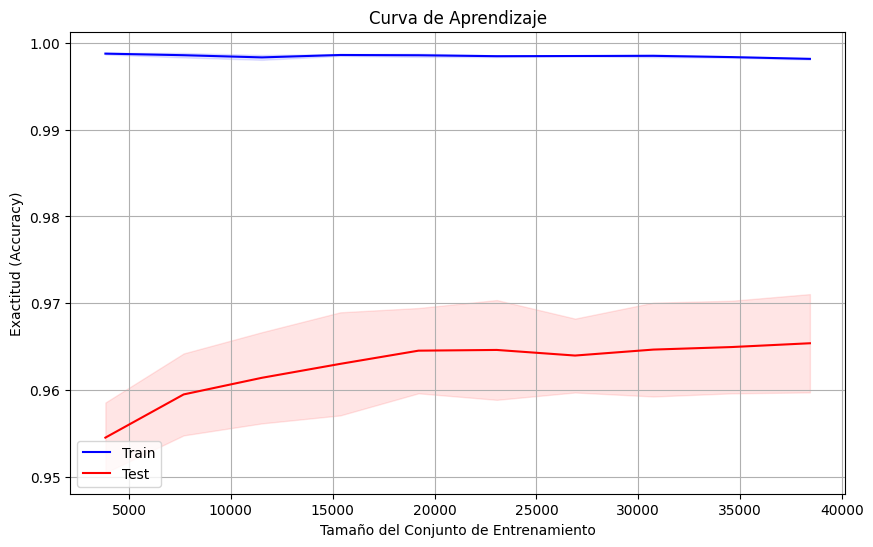

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])  # Todas las columnas excepto 'structure'
y = df_features["structure"]  # Columna 'structure'

# Dividir los datos en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200]
}

print("Ajustando modelo...")

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Predecir en train y test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Exactitud en Train: {train_accuracy:.4f}")
print(f"Exactitud en Test: {test_accuracy:.4f}")

# Matriz de confusión en train y test
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión en Train:\n", train_cm)
print("Matriz de confusión en Test:\n", test_cm)

# Reporte de clasificación en train y test
print("Reporte de clasificación en Train:\n", classification_report(y_train, y_train_pred))
print("Reporte de clasificación en Test:\n", classification_report(y_test, y_test_pred))

# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Train", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, test_mean, label="Test", color="red")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud (Accuracy)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Graficar la curva de aprendizaje del modelo ajustado
print("Ejecutandose...")
plot_learning_curve(best_model, X, y)

In [ ]:
#PARA EL ARTICULO


Fórmulas de métricas utilizadas:
1. Sensitivity/Recall = TP / (TP + FN)
2. Specificity = TN / (TN + FP)
3. Precision = TP / (TP + FP)
4. Accuracy = (TP + TN) / (TP + TN + FP + FN)
5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)
6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)

Ajustando modelo...

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Comparación de métricas
       Accuracy  Sensitivity  Specificity  Precision  F1-score     AUC
Train    0.9980       0.9980       0.9980     0.9980    0.9980  1.0000
Test     0.9716       0.9716       0.9715     0.9717    0.9716  0.9957

Matriz de confusión - Train:
[[19308    64]
 [   12 19041]]

Matriz de confusión - Test:
[[4572  168]
 [ 105 4762]]

Generando curva de aprendizaje...


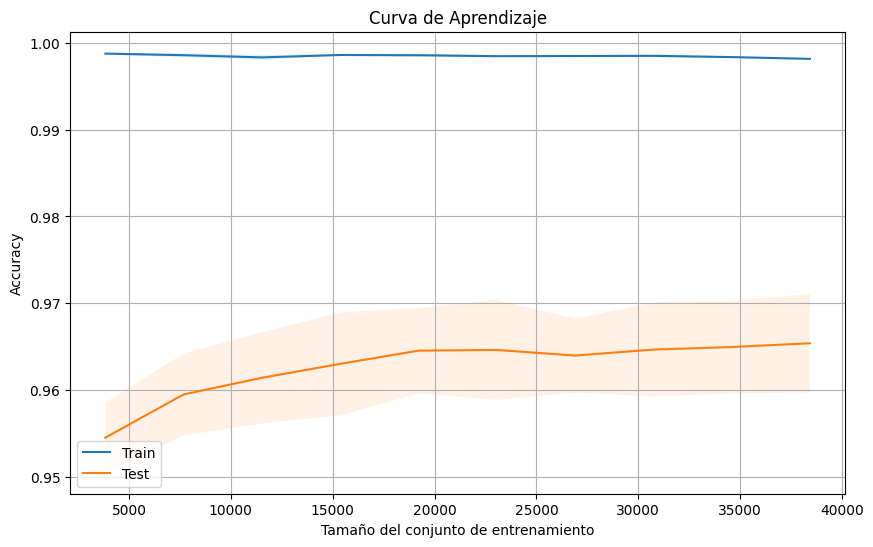

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             precision_recall_fscore_support, roc_auc_score)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Explicación de métricas con fórmulas
print("\n" + "="*60)
print("Fórmulas de métricas utilizadas:")
print("="*60)
print("1. Sensitivity/Recall = TP / (TP + FN)")
print("2. Specificity = TN / (TN + FP)")
print("3. Precision = TP / (TP + FP)")
print("4. Accuracy = (TP + TN) / (TP + TN + FP + FN)")
print("5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)")
print("6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)")
print("="*60 + "\n")

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])
y = df_features["structure"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200]
}

# Función para calcular métricas adicionales
def calcular_metricas(y_real, y_pred, y_proba):
    cm = confusion_matrix(y_real, y_pred)
    n_clases = cm.shape[0]
    metricas = {}
    
    # Cálculo de Specificity para cada clase
    especificidad = []
    for i in range(n_clases):
        tn = cm.sum() - (cm[i,:].sum() + cm[:,i].sum() - cm[i,i])
        fp = cm[:,i].sum() - cm[i,i]
        especificidad_clase = tn / (tn + fp) if (tn + fp) > 0 else 0
        especificidad.append(especificidad_clase)
    
    # Métricas promedio
    precision, recall, f1, _ = precision_recall_fscore_support(y_real, y_pred, average='weighted')
    especificidad_promedio = np.mean(especificidad)
    accuracy = accuracy_score(y_real, y_pred)
    
    # Cálculo de AUC
    if n_clases == 2:
        auc = roc_auc_score(y_real, y_proba[:, 1])
    else:
        auc = roc_auc_score(y_real, y_proba, multi_class='ovr', average='weighted')
    
    return {
        'Accuracy': accuracy,
        'Sensitivity': recall,
        'Specificity': especificidad_promedio,
        'Precision': precision,
        'F1-score': f1,
        'AUC': auc
    }

print("Ajustando modelo...")

# Búsqueda de hiperparámetros
modelo_base = RandomForestClassifier(random_state=42)
busqueda = GridSearchCV(modelo_base, param_grid, cv=5, scoring='accuracy')
busqueda.fit(X_train, y_train)

# Mejor modelo
mejor_modelo = busqueda.best_estimator_
print(f"\nMejores hiperparámetros: {busqueda.best_params_}")

# Predicciones
y_train_pred = mejor_modelo.predict(X_train)
y_test_pred = mejor_modelo.predict(X_test)

# Probabilidades para AUC
y_train_proba = mejor_modelo.predict_proba(X_train)
y_test_proba = mejor_modelo.predict_proba(X_test)

# Cálculo de métricas
metricas_train = calcular_metricas(y_train, y_train_pred, y_train_proba)
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_proba)

# Presentación de resultados
resultados = pd.DataFrame({
    'Train': metricas_train,
    'Test': metricas_test
}).T

print("\n" + "="*40)
print("Comparación de métricas")
print("="*40)
print(resultados.round(4))

# Matrices de confusión y curvas de aprendizaje
print("\nMatriz de confusión - Train:")
print(confusion_matrix(y_train, y_train_pred))

print("\nMatriz de confusión - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Función para graficar curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), output_file="learning_curve.pdf"):
    """
    Generate and save a learning curve plot with points and error bands.

    Parameters:
    - estimator: model to evaluate
    - X: features
    - y: target
    - cv: cross-validation folds
    - train_sizes: proportions of training data to use
    - output_file: file name for saving the plot
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    # Plot training score with points
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    # Plot validation score with points
    plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy", color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    
    # Customize plot
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)
    
    # Save the plot in PDF format
    plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

print("\nGenerando curva de aprendizaje...")
plot_learning_curve(best_model, X_train, y_train, output_file="results/learning_curve.pdf")



Fórmulas de métricas utilizadas:
1. Sensitivity/Recall = TP / (TP + FN)
2. Specificity = TN / (TN + FP)
3. Precision = TP / (TP + FP)
4. Accuracy = (TP + TN) / (TP + TN + FP + FN)
5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)
6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)

Ajustando modelo...

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Comparación de métricas
       Accuracy  Sensitivity  Specificity  Precision  F1-score     AUC
Train    0.9980       0.9980       0.9980     0.9980    0.9980  1.0000
Test     0.9716       0.9716       0.9715     0.9717    0.9716  0.9957

Matriz de confusión - Train:
[[19308    64]
 [   12 19041]]

Matriz de confusión - Test:
[[4572  168]
 [ 105 4762]]

Generando curva de aprendizaje...


FileNotFoundError: [Errno 2] No such file or directory: 'results/learning_curve.pdf'

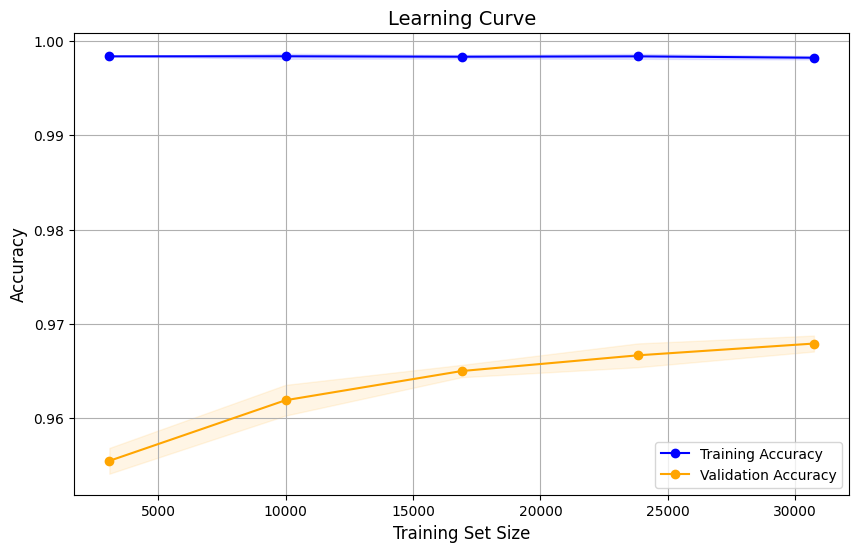

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             precision_recall_fscore_support, roc_auc_score)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Explicación de métricas con fórmulas
print("\n" + "="*60)
print("Fórmulas de métricas utilizadas:")
print("="*60)
print("1. Sensitivity/Recall = TP / (TP + FN)")
print("2. Specificity = TN / (TN + FP)")
print("3. Precision = TP / (TP + FP)")
print("4. Accuracy = (TP + TN) / (TP + TN + FP + FN)")
print("5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)")
print("6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)")
print("="*60 + "\n")

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])
y = df_features["structure"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200]
}

# Función para calcular métricas adicionales
def calcular_metricas(y_real, y_pred, y_proba):
    cm = confusion_matrix(y_real, y_pred)
    n_clases = cm.shape[0]
    metricas = {}
    
    # Cálculo de Specificity para cada clase
    especificidad = []
    for i in range(n_clases):
        tn = cm.sum() - (cm[i,:].sum() + cm[:,i].sum() - cm[i,i])
        fp = cm[:,i].sum() - cm[i,i]
        especificidad_clase = tn / (tn + fp) if (tn + fp) > 0 else 0
        especificidad.append(especificidad_clase)
    
    # Métricas promedio
    precision, recall, f1, _ = precision_recall_fscore_support(y_real, y_pred, average='weighted')
    especificidad_promedio = np.mean(especificidad)
    accuracy = accuracy_score(y_real, y_pred)
    
    # Cálculo de AUC
    if n_clases == 2:
        auc = roc_auc_score(y_real, y_proba[:, 1])
    else:
        auc = roc_auc_score(y_real, y_proba, multi_class='ovr', average='weighted')
    
    return {
        'Accuracy': accuracy,
        'Sensitivity': recall,
        'Specificity': especificidad_promedio,
        'Precision': precision,
        'F1-score': f1,
        'AUC': auc
    }

print("Ajustando modelo...")

# Búsqueda de hiperparámetros
modelo_base = RandomForestClassifier(random_state=42)
busqueda = GridSearchCV(modelo_base, param_grid, cv=5, scoring='accuracy')
busqueda.fit(X_train, y_train)

# Mejor modelo
mejor_modelo = busqueda.best_estimator_
print(f"\nMejores hiperparámetros: {busqueda.best_params_}")

# Predicciones
y_train_pred = mejor_modelo.predict(X_train)
y_test_pred = mejor_modelo.predict(X_test)

# Probabilidades para AUC
y_train_proba = mejor_modelo.predict_proba(X_train)
y_test_proba = mejor_modelo.predict_proba(X_test)

# Cálculo de métricas
metricas_train = calcular_metricas(y_train, y_train_pred, y_train_proba)
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_proba)

# Presentación de resultados
resultados = pd.DataFrame({
    'Train': metricas_train,
    'Test': metricas_test
}).T

print("\n" + "="*40)
print("Comparación de métricas")
print("="*40)
print(resultados.round(4))

# Matrices de confusión y curvas de aprendizaje
print("\nMatriz de confusión - Train:")
print(confusion_matrix(y_train, y_train_pred))

print("\nMatriz de confusión - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Función para graficar curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), output_file="learning_curve.pdf"):
    """
    Generate and save a learning curve plot with points and error bands.

    Parameters:
    - estimator: model to evaluate
    - X: features
    - y: target
    - cv: cross-validation folds
    - train_sizes: proportions of training data to use
    - output_file: file name for saving the plot
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    # Plot training score with points
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    # Plot validation score with points
    plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy", color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    
    # Customize plot
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)
    
    # Save the plot in PDF format
    plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

print("\nGenerando curva de aprendizaje...")
plot_learning_curve(mejor_modelo, X_train, y_train, output_file="results/learning_curve.pdf")



Fórmulas de métricas utilizadas:
1. Sensitivity/Recall = TP / (TP + FN)
2. Specificity = TN / (TN + FP)
3. Precision = TP / (TP + FP)
4. Accuracy = (TP + TN) / (TP + TN + FP + FN)
5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)
6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)

Ajustando modelo...

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Comparación de métricas
       Accuracy  Sensitivity  Specificity  Precision  F1-score     AUC
Train    0.9980       0.9980       0.9980     0.9980    0.9980  1.0000
Test     0.9716       0.9716       0.9715     0.9717    0.9716  0.9957

Matriz de confusión - Train:
[[19308    64]
 [   12 19041]]

Matriz de confusión - Test:
[[4572  168]
 [ 105 4762]]

Generando curva de aprendizaje...


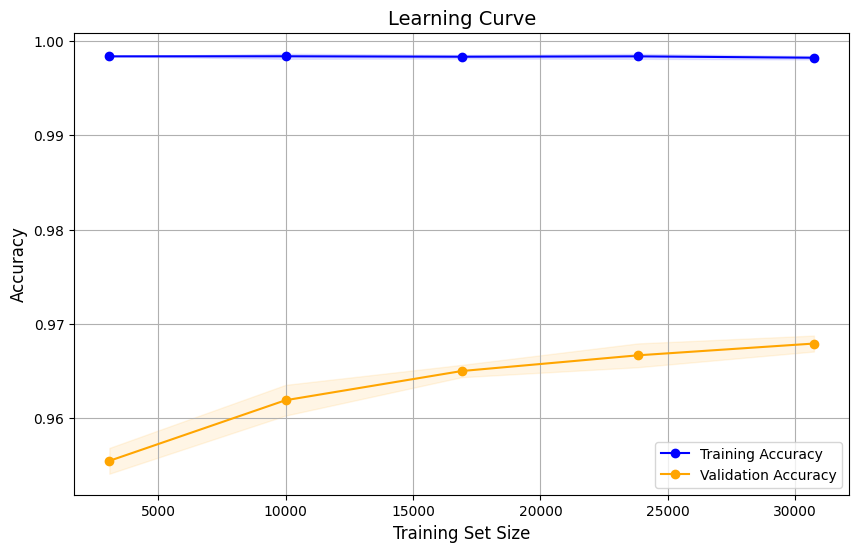

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             precision_recall_fscore_support, roc_auc_score)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Explicación de métricas con fórmulas
print("\n" + "="*60)
print("Fórmulas de métricas utilizadas:")
print("="*60)
print("1. Sensitivity/Recall = TP / (TP + FN)")
print("2. Specificity = TN / (TN + FP)")
print("3. Precision = TP / (TP + FP)")
print("4. Accuracy = (TP + TN) / (TP + TN + FP + FN)")
print("5. F1-score = 2 * (Precision * Recall) / (Precision + Recall)")
print("6. AUC = Área bajo la curva ROC (One-vs-Rest para multiclase)")
print("="*60 + "\n")

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])
y = df_features["structure"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 200]
}

# Función para calcular métricas adicionales
def calcular_metricas(y_real, y_pred, y_proba):
    cm = confusion_matrix(y_real, y_pred)
    n_clases = cm.shape[0]
    metricas = {}
    
    # Cálculo de Specificity para cada clase
    especificidad = []
    for i in range(n_clases):
        tn = cm.sum() - (cm[i,:].sum() + cm[:,i].sum() - cm[i,i])
        fp = cm[:,i].sum() - cm[i,i]
        especificidad_clase = tn / (tn + fp) if (tn + fp) > 0 else 0
        especificidad.append(especificidad_clase)
    
    # Métricas promedio
    precision, recall, f1, _ = precision_recall_fscore_support(y_real, y_pred, average='weighted')
    especificidad_promedio = np.mean(especificidad)
    accuracy = accuracy_score(y_real, y_pred)
    
    # Cálculo de AUC
    if n_clases == 2:
        auc = roc_auc_score(y_real, y_proba[:, 1])
    else:
        auc = roc_auc_score(y_real, y_proba, multi_class='ovr', average='weighted')
    
    return {
        'Accuracy': accuracy,
        'Sensitivity': recall,
        'Specificity': especificidad_promedio,
        'Precision': precision,
        'F1-score': f1,
        'AUC': auc
    }

print("Ajustando modelo...")

# Búsqueda de hiperparámetros
modelo_base = RandomForestClassifier(random_state=42)
busqueda = GridSearchCV(modelo_base, param_grid, cv=5, scoring='accuracy')
busqueda.fit(X_train, y_train)

# Mejor modelo
mejor_modelo = busqueda.best_estimator_
print(f"\nMejores hiperparámetros: {busqueda.best_params_}")

# Predicciones
y_train_pred = mejor_modelo.predict(X_train)
y_test_pred = mejor_modelo.predict(X_test)

# Probabilidades para AUC
y_train_proba = mejor_modelo.predict_proba(X_train)
y_test_proba = mejor_modelo.predict_proba(X_test)

# Cálculo de métricas
metricas_train = calcular_metricas(y_train, y_train_pred, y_train_proba)
metricas_test = calcular_metricas(y_test, y_test_pred, y_test_proba)

# Presentación de resultados
resultados = pd.DataFrame({
    'Train': metricas_train,
    'Test': metricas_test
}).T

print("\n" + "="*40)
print("Comparación de métricas")
print("="*40)
print(resultados.round(4))

# Matrices de confusión y curvas de aprendizaje
print("\nMatriz de confusión - Train:")
print(confusion_matrix(y_train, y_train_pred))

print("\nMatriz de confusión - Test:")
print(confusion_matrix(y_test, y_test_pred))

# Función para graficar curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), output_file="learning_curve.pdf"):
    """
    Generate and save a learning curve plot with points and error bands.

    Parameters:
    - estimator: model to evaluate
    - X: features
    - y: target
    - cv: cross-validation folds
    - train_sizes: proportions of training data to use
    - output_file: file name for saving the plot
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    # Plot training score with points
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    # Plot validation score with points
    plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy", color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    
    # Customize plot
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True)
    
    # Save the plot in PDF format
    plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

print("\nGenerando curva de aprendizaje...")
plot_learning_curve(mejor_modelo, X_train, y_train, output_file="results/learning_curve.pdf")


In [3]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(mejor_modelo, "random_forest_best_model.pkl")
print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


In [4]:
# Cargar el modelo en otro script o notebook
modelo_rf = joblib.load("random_forest_best_model.pkl")
print("Modelo cargado correctamente.")


Modelo cargado correctamente.


In [ ]:
# MEJORANDO MAS EL MODELO V2

Ajustando modelo...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Entrenando el modelo final...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Exactitud en Train: 0.9815
Exactitud en Test: 0.9677
Matriz de confusión en Train:
 [[18891   481]
 [  228 18825]]
Matriz de confusión en Test:
 [[4545  195]
 [ 115 4752]]
Reporte de clasificación en Train:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     19372
           1       0.98      0.99      0.98     19053

    accuracy                           0.98     38425
   macro avg       0.98      0.98      0.98     38425
weighted avg       0.98      0.98      0.98     38425

Reporte de clasificación en Test:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4740
           1       0.96      0.98      0.97      4867

    accuracy                           0.97      9607
   macro avg       0.97      0.97      0.97      9607
weighted avg       0.97      0.97      0.97      9607

Generando la curva de aprendizaje...


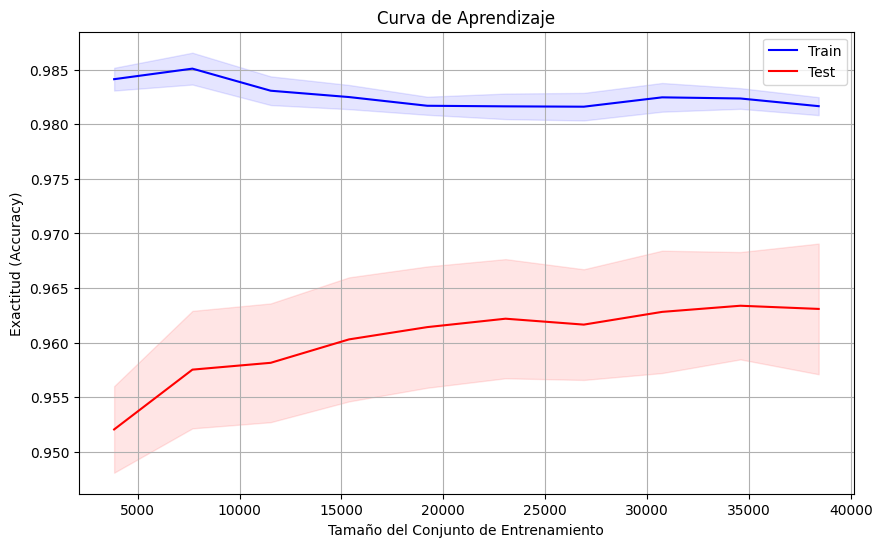

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])  # Todas las columnas excepto 'structure'
y = df_features["structure"]  # Columna 'structure'

# Dividir los datos en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros optimizada
param_grid = {
    'max_depth': [5, 8, 12],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2']
}

print("Ajustando modelo...")

# Crear el modelo base
model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring="accuracy",
    verbose=2,  # Seguimiento detallado del proceso
    n_jobs=-1   # Usar todos los núcleos disponibles para acelerar el entrenamiento
)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(
    random_state=42,
    **grid_search.best_params_,
    verbose=1  # Seguimiento detallado durante el entrenamiento del modelo final
)
print("Entrenando el modelo final...")
best_model.fit(X_train, y_train)

# Predecir en train y test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Exactitud en Train: {train_accuracy:.4f}")
print(f"Exactitud en Test: {test_accuracy:.4f}")

# Matriz de confusión en train y test
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión en Train:\n", train_cm)
print("Matriz de confusión en Test:\n", test_cm)

# Reporte de clasificación en train y test
print("Reporte de clasificación en Train:\n", classification_report(y_train, y_train_pred))
print("Reporte de clasificación en Test:\n", classification_report(y_test, y_test_pred))

# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Train", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, test_mean, label="Test", color="red")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud (Accuracy)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Graficar la curva de aprendizaje del modelo ajustado
print("Generando la curva de aprendizaje...")
plot_learning_curve(best_model, X, y)


In [ ]:
#REVISAR BALANCEO DE DATOS

In [4]:
import pandas as pd

# Cargar el CSV
df_features = pd.read_csv("features_final.csv")

# Contar el número de muestras en cada clase
class_counts = df_features["structure"].value_counts()
print(class_counts)

# LA DIFERENCIA ES DE 192 NO ES MUCHA

0    24112
1    23920
Name: structure, dtype: int64


In [ ]:
#a) Submuestreo (Undersampling)
# Consiste en reducir el número de muestras de la clase mayoritaria 
# para equilibrar las clases.

0    23920
1    23920
Name: structure, dtype: int64
Ajustando modelo...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Entrenando el modelo final...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Exactitud en Train: 0.9817
Exactitud en Test: 0.9667
Matriz de confusión en Train:
 [[18737   483]
 [  219 18833]]
Matriz de confusión en Test:
 [[4502  198]
 [ 121 4747]]
Reporte de clasificación en Train:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     19220
           1       0.97      0.99      0.98     19052

    accuracy                           0.98     38272
   macro avg       0.98      0.98      0.98     38272
weighted avg       0.98      0.98      0.98     38272

Reporte de clasificación en Test:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4700
           1       0.96      0.98      0.97      4868

    accuracy                           0.97      9568
   macro avg       0.97      0.97      0.97      9568
weighted avg       0.97      0.97      0.97      9568

Generando la curva de aprendizaje...


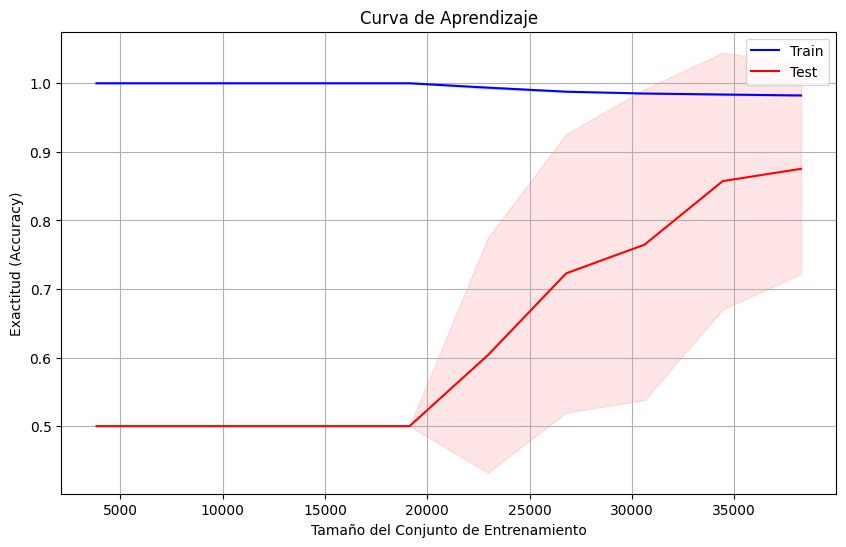

In [5]:
# -------------------------------- balancear los datos, equilibrar  -----------------------

from sklearn.utils import resample
import pandas as pd

# Cargar el CSV
df_features1 = pd.read_csv("features_final.csv")

# Separar las clases
df_majority = df_features[df_features1["structure"] == 0]  # Clase mayoritaria
df_minority = df_features[df_features1["structure"] == 1]  # Clase minoritaria

# Submuestrear la clase mayoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar las clases balanceadas
df_features = pd.concat([df_majority_downsampled, df_minority])

# Verificar el balanceo
print(df_features["structure"].value_counts())

# -------------------------------- preparar el modelo -----------------------
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el CSV
#df_features = pd.read_csv("features_stage4_2.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])  # Todas las columnas excepto 'structure'
y = df_features["structure"]  # Columna 'structure'

# Dividir los datos en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la grilla de hiperparámetros optimizada
param_grid = {
    'max_depth': [5, 8, 12],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2']
}

print("Ajustando modelo...")

# Crear el modelo base
model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring="accuracy",
    verbose=2,  # Seguimiento detallado del proceso
    n_jobs=-1   # Usar todos los núcleos disponibles para acelerar el entrenamiento
)
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(
    random_state=42,
    **grid_search.best_params_,
    verbose=1  # Seguimiento detallado durante el entrenamiento del modelo final
)
print("Entrenando el modelo final...")
best_model.fit(X_train, y_train)

# Predecir en train y test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Exactitud en Train: {train_accuracy:.4f}")
print(f"Exactitud en Test: {test_accuracy:.4f}")

# Matriz de confusión en train y test
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión en Train:\n", train_cm)
print("Matriz de confusión en Test:\n", test_cm)

# Reporte de clasificación en train y test
print("Reporte de clasificación en Train:\n", classification_report(y_train, y_train_pred))
print("Reporte de clasificación en Test:\n", classification_report(y_test, y_test_pred))

# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Train", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, test_mean, label="Test", color="red")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud (Accuracy)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Graficar la curva de aprendizaje del modelo ajustado
print("Generando la curva de aprendizaje...")
plot_learning_curve(best_model, X, y)


In [ ]:
# REDUCCION DE DIMENSIONALIDAD
#1. Selección de Características Basada en Importancia

        Feature  Importance
52        r_std    0.116853
54        b_std    0.072054
53        g_std    0.069036
26   haralick_6    0.065920
2           min    0.063255
40   fft_energy    0.047735
224    hist_r_4    0.045427
215    hist_g_3    0.034540
0          mean    0.034096
50       g_mean    0.030463


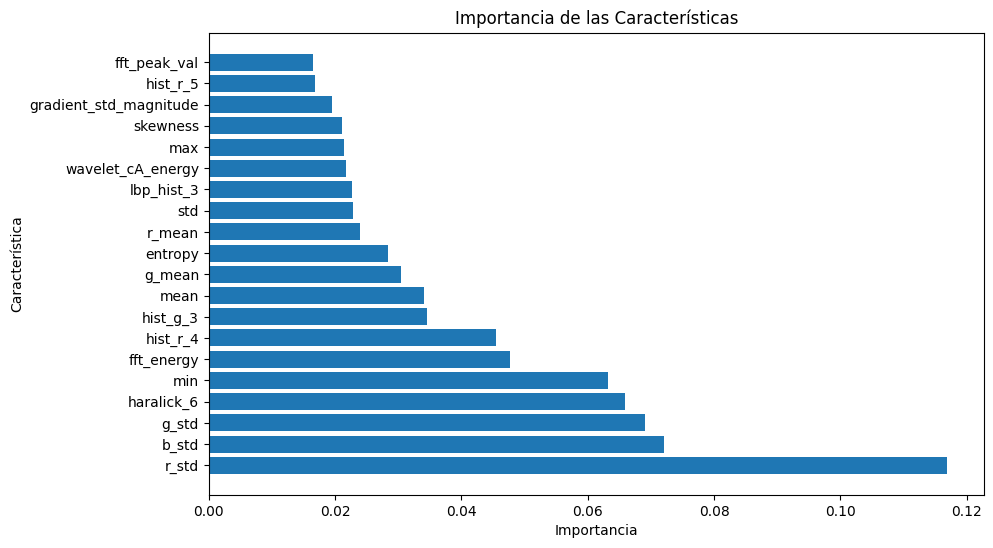

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Exactitud en Train (con características seleccionadas): 0.9855
Exactitud en Test (con características seleccionadas): 0.9621


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = best_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar las 10 características más importantes
print(importance_df.head(10))

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20])  # Top 20 características
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# Seleccionar características con importancia > 0.01
selected_features = importance_df[importance_df["Importance"] > 0.01]["Feature"]

# Filtrar los datos para usar solo las características seleccionadas
X_selected = X[selected_features]

# Dividir los datos en train y test
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las características seleccionadas
best_model_selected = RandomForestClassifier(
    random_state=42,
    **grid_search.best_params_,
    verbose=1
)
best_model_selected.fit(X_train_selected, y_train)

# Evaluar el modelo
y_train_pred_selected = best_model_selected.predict(X_train_selected)
y_test_pred_selected = best_model_selected.predict(X_test_selected)

print(f"Exactitud en Train (con características seleccionadas): {accuracy_score(y_train, y_train_pred_selected):.4f}")
print(f"Exactitud en Test (con características seleccionadas): {accuracy_score(y_test, y_test_pred_selected):.4f}")


In [ ]:
# 2. AHORA APLICARE PCA / ANALISIS DE COMPONENTES PRINCIPALES 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Verificar el número de componentes seleccionados
print(f"Número de componentes seleccionados: {pca.n_components_}")


# Dividir los datos en train y test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los componentes principales
best_model_pca = RandomForestClassifier(
    random_state=42,
    **grid_search.best_params_,
    verbose=1
)
best_model_pca.fit(X_train_pca, y_train)

# Evaluar el modelo
y_train_pred_pca = best_model_pca.predict(X_train_pca)
y_test_pred_pca = best_model_pca.predict(X_test_pca)

print(f"Exactitud en Train (con PCA): {accuracy_score(y_train, y_train_pred_pca):.4f}")
print(f"Exactitud en Test (con PCA): {accuracy_score(y_test, y_test_pred_pca):.4f}")


Número de componentes seleccionados: 56


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s


Exactitud en Train (con PCA): 0.9857
Exactitud en Test (con PCA): 0.9428


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
# AJUSTE DE HIPERPARAMETROS Y VALIDACION Validación Cruzada CON 
# 1  balanceo de datos  - caracteristicas importantes - PCA

C:\Users\richa\AppData\Local\Temp\ipykernel_7320\2025155394.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = df_features[df_features1["structure"] == 0]  # Clase mayoritaria
C:\Users\richa\AppData\Local\Temp\ipykernel_7320\2025155394.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_minority = df_features[df_features1["structure"] == 1]  # Clase minoritaria


0    3102
1    3102
Name: structure, dtype: int64
Top 10 características más importantes:
         Feature  Importance
52        r_std    0.111654
53        g_std    0.076616
54        b_std    0.067060
2           min    0.058727
26   haralick_6    0.057278
40   fft_energy    0.043027
224    hist_r_4    0.040002
0          mean    0.033370
50       g_mean    0.031421
215    hist_g_3    0.030779


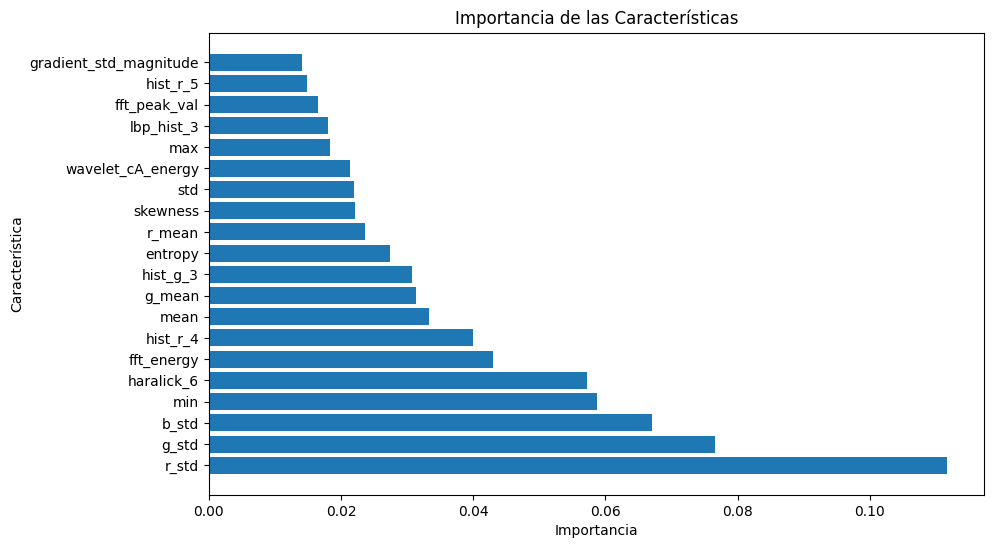

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud media en validación cruzada: 0.9686 (± 0.0036)
Exactitud en Train: 1.0000
Exactitud en Test: 0.9782
Matriz de confusión en Train:
 [[2460    0]
 [   0 2503]]
Matriz de confusión en Test:
 [[626  16]
 [ 11 588]]
Reporte de clasificación en Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2460
           1       1.00      1.00      1.00      2503

    accuracy                           1.00      4963
   macro avg       1.00      1.00      1.00      4963
weighted avg       1.00      1.00      1.00      4963

Reporte de clasificación en Test:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       642
           1       0.97      0.98      0.98       599

    accuracy      

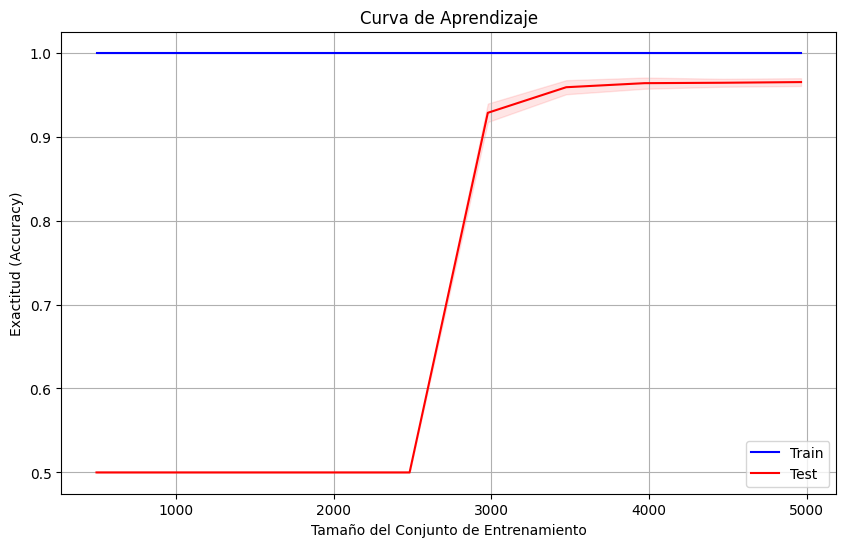

In [15]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------------- balancear los datos, equilibrar  -----------------------

# Cargar el CSV
df_features1 = pd.read_csv("features_stage4_2.csv")

# Separar las clases
df_majority = df_features[df_features1["structure"] == 0]  # Clase mayoritaria
df_minority = df_features[df_features1["structure"] == 1]  # Clase minoritaria

# Submuestrear la clase mayoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar las clases balanceadas
df_features = pd.concat([df_majority_downsampled, df_minority])

# Verificar el balanceo
print(df_features["structure"].value_counts())


# -------------------------------- Cargar y preparar los datos -----------------------

# Cargar el CSV
#df_features = pd.read_csv("features_stage4_2.csv")

# Separar características (X) y variable objetivo (y)
X = df_features.drop(columns=["structure"])  # Todas las columnas excepto 'structure'
y = df_features["structure"]  # Columna 'structure'

# -------------------------------- Selección de características basada en importancia -----------------------

# Entrenar un modelo inicial para obtener la importancia de las características
initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X, y)

# Obtener la importancia de las características
importances = initial_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar las 10 características más importantes
print("Top 10 características más importantes:\n", importance_df.head(10))

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20])  # Top 20 características
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# Seleccionar características con importancia > 0.01
selected_features = importance_df[importance_df["Importance"] > 0.01]["Feature"]

# Filtrar los datos para usar solo las características seleccionadas
X_selected = X[selected_features]

# Dividir los datos en train y test
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# -------------------------------- Ajuste de hiperparámetros -----------------------

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 20],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 8],  # Mínimo de muestras en un nodo hoja
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_features': ['sqrt', 'log2', None]  # Número de características a considerar en cada división
}

# Crear el modelo base
model = RandomForestClassifier(random_state=42)

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring="accuracy",
    verbose=2,  # Seguimiento detallado del proceso
    n_jobs=-1   # Usar todos los núcleos disponibles para acelerar el entrenamiento
)
grid_search.fit(X_train_selected, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(
    random_state=42,
    **grid_search.best_params_,
    verbose=0  # Desactivar mensajes de progreso
)
best_model.fit(X_train_selected, y_train)

# -------------------------------- Validación cruzada -----------------------

# Aplicar validación cruzada
cv_scores = cross_val_score(best_model, X_selected, y, cv=5, scoring="accuracy")

# Mostrar los resultados de la validación cruzada
print(f"Exactitud media en validación cruzada: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

# -------------------------------- Evaluación del modelo -----------------------

# Predecir en train y test
y_train_pred = best_model.predict(X_train_selected)
y_test_pred = best_model.predict(X_test_selected)

# Exactitud en train y test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Exactitud en Train: {train_accuracy:.4f}")
print(f"Exactitud en Test: {test_accuracy:.4f}")

# Matriz de confusión en train y test
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión en Train:\n", train_cm)
print("Matriz de confusión en Test:\n", test_cm)

# Reporte de clasificación en train y test
print("Reporte de clasificación en Train:\n", classification_report(y_train, y_train_pred))
print("Reporte de clasificación en Test:\n", classification_report(y_test, y_test_pred))


# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Train", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.plot(train_sizes, test_mean, label="Test", color="red")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Exactitud (Accuracy)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Graficar la curva de aprendizaje del modelo ajustado
print("Generando la curva de aprendizaje...")
plot_learning_curve(best_model, X, y)
